##  `Задание:`

# Основные `цели` этого задания:

- Научиться работать с документацией scikit-learn

- Научиться готовить данные к обучению модели и к ее валидации

- Научиться оценивать качество модели и выбирать лучшую модель, опираясь на метрики

`Задача:`

Построить модель машинного обучения для решения задачи регрессии:
- необходимо спрогнозировать прогресс заболевания `диабетом` через год после исходного уровня.

`План решения:`

1. В документации библиотеки scikit learn найдите, как загрузить датасет для построения модели прогноза прогрессирования заболевания через год после исходного уровня.

2. Выведите содержимое поля DESCR, которое вернет функция, загружающая датасет, чтобы изучить содержимое датасета.

3. Подготовьте данные к обучению моделей:
- отделите целевой признак от датасета, разделите датасет на тренировочную и валидационную части.
- Обучите решающее дерево и оцените адекватность обученной модели.\
 Для этого достаточно сравнить метрики качества с метриками, получаемыми от простой модели.\
  Например, если бы мы подавали на вход среднее значение целевой переменной на обучающей части выборки.
- Обучите линейную регрессию и оцените ее адекватность.
- Выберите лучшую модель и обоснуйте свой выбор.

                                                        PIPELINE
--------

• `Подгружаем` датасет 

• `Решаем` задачу Регрессии, так как ЦЕЛЕВОЙ признак - это степень развития заболевания (кол-ый признак). Используем `метрики MAE/MSE/RMSE`

• Обучаем на `70-80%` датасета, валидируем  (оцениваем качество) на остальных `20-30%`

• Оценить качество (`проверить` `модель` на адекватность), если бы предсказывали средним по обучающей выборке, и `сравнить` `значения`.

• Рассчитываем  `метрики`. Используем `готовые` решения из модуля `sklearn.metrics`

• Поскольку решаем задачу регрессии, нам нужно `импортировать` классы `DecisionTreeRegressor` и `LinearRegression`

--------

`1. `В документации библиотеки scikit learn найдите, как загрузить датасет для построения модели прогноза прогрессирования заболевания через год после исходного уровня.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

In [2]:
df = load_diabetes(as_frame=True).frame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


- пропуски отсутствуют
- в датасэте 442 строки 11 столбцов

In [4]:
pd.options.display.float_format = '{:.4f}'.format
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,152.1335
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,77.0930
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378,25.0000
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332,87.0000
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011,140.5000
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279,211.5000
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356,346.0000


In [5]:
df.head(4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000


- столбцы содержащие `ПРИЗНАКИ`: age, sex, bmi, bp, s1, s2, s3, s4, s5, s6
- столбец содержащий `целевой ПРИЗНАК`: target

<Axes: >

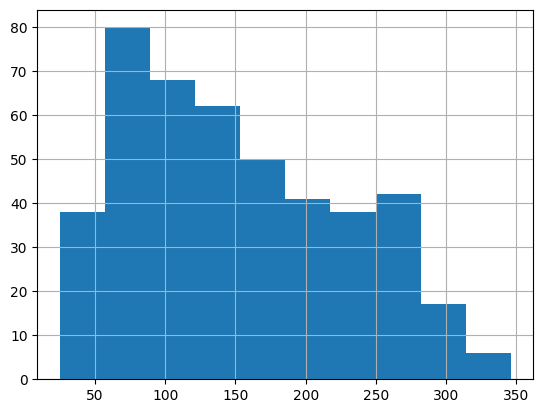

In [6]:
df.target.hist()

`2.` Выведите содержимое поля DESCR, которое вернет функция, загружающая датасет, чтобы изучить содержимое датасета.

In [7]:
# выводим описание набора данных load_diabetes
print(load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

`3. `Подготовьте данные к обучению моделей:

In [8]:
# features - набор признаков
# target - целевая переменная

features = df.drop(['target'], axis=1)
target = df['target']

print(features.shape)
print(target.shape)

(442, 10)
(442,)


- разделим датасэт на тренировочную и валидационную части
- для валидационного набора отводим 25% (test_size=0.25) остальные данные для тренировки модэли


In [ ]:
# X_train - данные для тренировки модели
# X_test - данные для проверки модели

# y_test  - целевые признаки тестовая часть датасэта
# y_train - целевые признаки тренировочная часть датасэта

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
# futures_train - набор признаков для обучения
# target_train  - набор целевых переменных для обучения

futures_train, futures_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=42)

`4.` Обучите решающее дерево и оцените адекватность обученной модели.

In [10]:
model_tree_r2 = DecisionTreeRegressor() # создаем экземпляр модели регрессии на основе дерева принятия решений
model_tree_r2.fit(futures_train,target_train) # обучение модели на данных model.fit(features, target)

predictions = model_tree_r2.predict(futures_valid)
r2 = r2_score(target_valid, predictions)    # (целевая переменная, прогнозное значение)
print("DecisionTree_R2:", r2)

DecisionTree_R2: -0.0826894736851378


In [11]:
model_tree_mse = DecisionTreeRegressor() 
model_tree_mse.fit(futures_train, target_train)

predictions = model_tree_mse.predict(futures_valid)
mse = mean_squared_error(target_valid, predictions)
print("DecisionTree_MSE:", mse)

DecisionTree_MSE: 5520.666666666667


In [12]:
model_tree_mae = DecisionTreeRegressor() 
model_tree_mae.fit(futures_train, target_train)

predictions = model_tree_mae.predict(futures_valid)
DecisionTree_mae = mean_absolute_error(target_valid, predictions)
print("DecisionTree_MAE:", DecisionTree_mae)

DecisionTree_MAE: 55.06306306306306


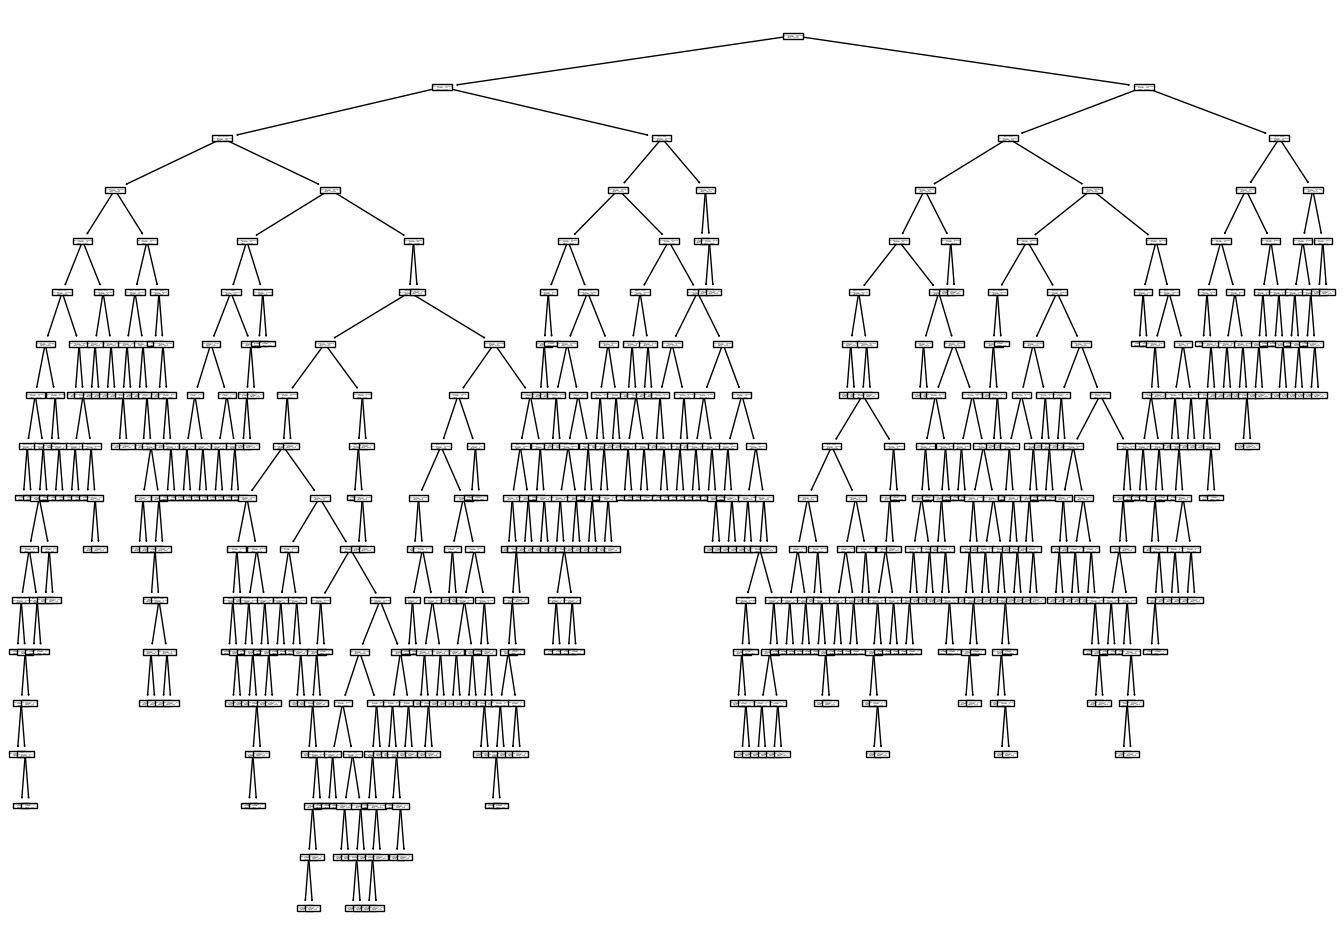

In [13]:
plt.figure(figsize=[17, 12])
tree.plot_tree(model_tree_r2, feature_names=list(df.columns));

In [14]:
mean_value = np.round(target_train.mean())                          # Вычисление среднего значения target_train
mean_predict_val = np.full((target_valid.shape[0], 1), mean_value)  # Создание массива с одним значением

print(mean_predict_val)


[[154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]
 [154.]]


-  DummyRegressor

In [21]:
model_tree_dummy = DummyRegressor() 
model_tree_dummy.fit(futures_train, target_train)

predictions = model_tree_dummy.predict(futures_valid)
Dummy_r2 = r2_score(target_valid, predictions)
print("DummyRegressor_r2:", Dummy_r2)

DummyRegressor_r2: -0.014016723490579253


In [22]:
model_tree_dummy = DummyRegressor() 
model_tree_dummy.fit(futures_train, target_train)

predictions = model_tree_dummy.predict(futures_valid)
Dummy_MSE = mean_squared_error(target_valid, predictions)
print("DummyRegressor_MSE:", Dummy_MSE)

DummyRegressor_MSE: 5607.197930791938


In [23]:
model_tree_dummy = DummyRegressor() 
model_tree_dummy.fit(futures_train, target_train)

predictions = model_tree_dummy.predict(futures_valid)
DummyRegressor_MAE = mean_absolute_error(target_valid, predictions)
print("DummyRegressor_MAE:", DummyRegressor_MAE)

DummyRegressor_MAE: 65.52742168150024


`Выводы:`
- `обе` модели обучения показывают `низкую` эффективность. На это указывают параметры метрик `R2, MAE и  MSE`
- при выборе из 2х моделей можно отметить `DecisionTreeRegressor`, так как у него параметры `MAE` и `MSE` `лучше`

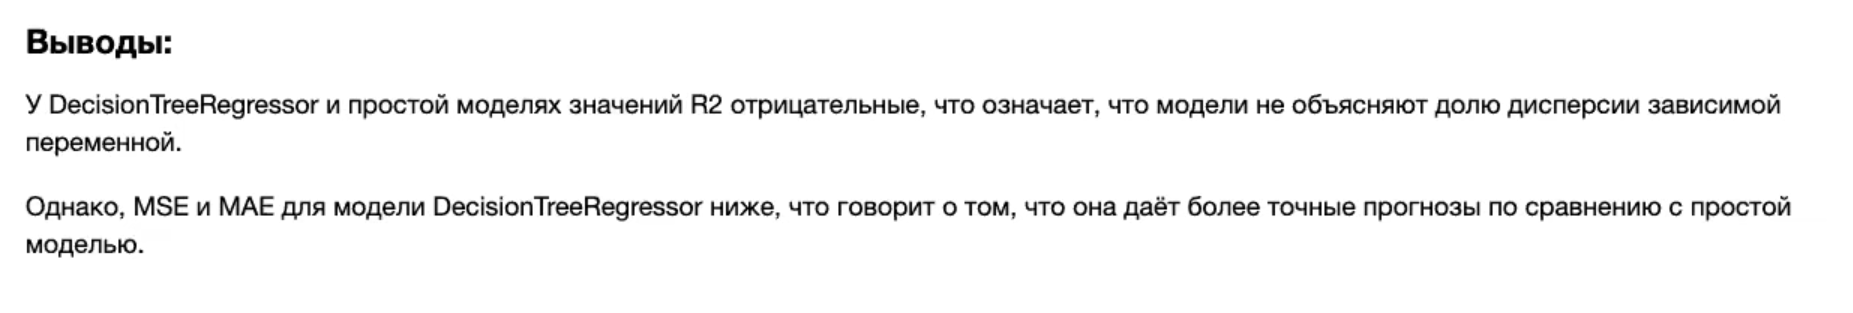

`5.` Обучите линейную регрессию и оцените ее адекватность.

In [15]:
LinearReg = LinearRegression() 
LinearReg.fit(futures_train, target_train)

predictions = LinearReg.predict(futures_valid)
Line_MAE = mean_absolute_error(target_valid, predictions)
print("LinearRegression_MAE:", Line_MAE)

LinearRegression_MAE: 41.54850685988059


In [16]:
LinearReg = LinearRegression() 
LinearReg.fit(futures_train, target_train)

predictions = LinearReg.predict(futures_valid)
Line_r2 = r2_score(target_valid, predictions)
print("LinearRegression_R2:", Line_r2)

LinearRegression_R2: 0.4849058889476756


In [17]:
LinearReg = LinearRegression() 
LinearReg.fit(futures_train, target_train)

predictions = LinearReg.predict(futures_valid)
Line_MSE = mean_squared_error(target_valid, predictions)
print("LinearRegression_MSE:", Line_MSE)

LinearRegression_MSE: 2848.3106508475053


`6.` Выберите лучшую модель и обоснуйте свой выбор.

- `LinearRegression` модель работает лучше, так как метрики ее работы лучше.\
Например R2 в положительна, в отличии от DecisionTreeRegressor и DummyRegressor.\
остальные метрики у нее тоже лучше. 